In [119]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from data_cleaning.data_cleaner import DataCleaner

print(tf.__version__)


2.16.2


# Linear Regression for Sea Level 1

**inputs**: Year, Country, Sea level rise, Average rainfall  
**output**: Average temperature

In [120]:
# Current working directory
current_directory = os.getcwd()

# Go up one directory to the root
root = os.path.abspath(os.path.join(current_directory, ".."))

# Get the path to the data
data_path = os.path.join(root, 'clean-data/processed_Sea_level_1_data.csv')

dc: DataCleaner = DataCleaner(data_path)
dc.preview(10)


,Year,Country,Avg Temperature (°C),Sea Level Rise (mm),Rainfall (mm)
0,2000,Argentina,16.900000,4.000000,2047.000000
1,2000,Australia,11.933333,2.266667,2033.333333
2,2000,Brazil,31.200000,3.700000,803.000000
3,2000,Canada,19.300000,2.650000,1383.000000
4,2000,China,26.200000,2.200000,1849.000000
5,2000,France,16.600000,2.800000,1819.666667
6,2000,Germany,9.750000,1.450000,2641.000000
7,2000,India,21.250000,3.250000,1124.500000
8,2000,Indonesia,23.585714,3.242857,1781.428571
9,2000,Mexico,16.900000,1.200000,1974.500000


In [121]:
df_copy = dc.df.copy()

# One Hot Encode the country column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
country_encoded = encoder.fit_transform(dc.df[['Country']])
country_columns = encoder.get_feature_names_out(['Country'])

df_encoded = pd.concat([dc.df.drop(columns=['Country']), pd.DataFrame(country_encoded, columns=country_columns)], axis=1)
print(df_encoded)

     Year  Avg Temperature (°C)  Sea Level Rise (mm)  Rainfall (mm)  \
0    2000             16.900000             4.000000    2047.000000   
1    2000             11.933333             2.266667    2033.333333   
2    2000             31.200000             3.700000     803.000000   
3    2000             19.300000             2.650000    1383.000000   
4    2000             26.200000             2.200000    1849.000000   
..    ...                   ...                  ...            ...   
335  2023             20.000000             2.750000    1772.500000   
336  2023             30.900000             3.300000     979.000000   
337  2023             19.600000             2.700000    1260.500000   
338  2023             30.300000             2.750000    1503.000000   
339  2023             16.257143             2.671429    1532.000000   

     Country_Argentina  Country_Australia  Country_Brazil  Country_Canada  \
0                  1.0                0.0             0.0             

In [122]:
# Extract features and target
X = df_encoded["Year"].values.reshape(-1, 1)
X = np.hstack((X, df_encoded.drop(columns=["Avg Temperature (°C)", "Year"]).values))
Y = df_encoded["Avg Temperature (°C)"].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [123]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=X.shape[1], activation='linear')  # Linear Regression
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [124]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [125]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=5, validation_split=0.2, verbose=1)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 16585.0293 - val_loss: 12335.5439
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16232.8496 - val_loss: 10929.8594
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10734.6826 - val_loss: 9761.7852
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11811.1201 - val_loss: 8359.3477
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9649.0000 - val_loss: 7261.4639
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8184.2241 - val_loss: 6240.4258
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6905.3613 - val_loss: 5346.9731
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6012.5928 - val_loss: 4570.8330
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4444.3345 - val_loss: 3885.8958
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4079.6111 - val_loss: 3289.1868
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3340.5879 - val_loss: 2

In [126]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, Y_test)
print(f"Test Loss (MSE): {test_loss}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 41.9512
Test Loss (MSE): 43.2646484375


In [127]:
# Predict on the test set
Y_pred = model.predict(X_test)
print(Y_pred)
print(Y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[20.300861]
 [20.406647]
 [19.294827]
 [19.683496]
 [19.29397 ]
 [19.568113]
 [20.91104 ]
 [20.61017 ]
 [19.367346]
 [18.902885]
 [20.668343]
 [20.060099]
 [20.855263]
 [20.622477]
 [18.87288 ]
 [19.095028]
 [21.397547]
 [20.589449]
 [20.509989]
 [20.80101 ]
 [19.692423]
 [19.751863]
 [19.75778 ]
 [18.392414]
 [19.521164]
 [20.718868]
 [20.138496]
 [21.039135]
 [20.070053]
 [19.715076]
 [19.671835]
 [19.941936]
 [19.16946 ]
 [19.790594]
 [19.261185]
 [19.515059]
 [20.060326]
 [19.149826]
 [19.322609]
 [20.440247]
 [19.418056]
 [19.793146]
 [18.898956]
 [19.594122]
 [21.76727 ]
 [19.218416]
 [18.63053 ]
 [21.600151]
 [20.097973]
 [20.093933]
 [20.73442 ]
 [19.498938]
 [19.930893]
 [20.533197]
 [19.79043 ]
 [20.385534]
 [20.25821 ]
 [20.63216 ]
 [20.296667]
 [19.484356]
 [19.724934]
 [18.38045 ]
 [19.895966]
 [19.219341]
 [18.67243 ]
 [19.79823 ]
 [20.009169]
 [19.270117]]
[[33.3       ]
 [19.2       ]
 [12.05      ]
 [12.06666667]
 [21.9       ]
 [

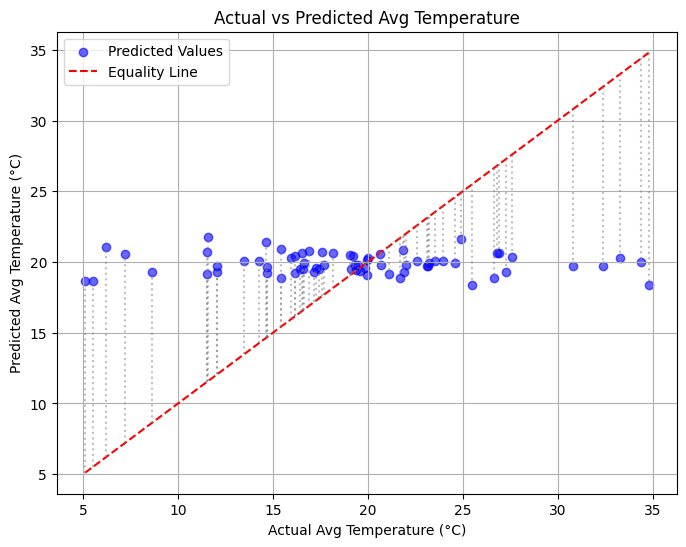

In [128]:
# Plotting Actual vs Predicted with a line of equality
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(Y_test, Y_pred, label='Predicted Values', color='blue', alpha=0.6)

# Line of equality
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Equality Line')

# Connecting actual and predicted values
for actual, predicted in zip(Y_test, Y_pred):
    plt.plot([actual, actual], [actual, predicted], color='gray', linestyle='dotted', alpha=0.5)

# Labels and title
plt.xlabel('Actual Avg Temperature (°C)')
plt.ylabel('Predicted Avg Temperature (°C)')
plt.title('Actual vs Predicted Avg Temperature')

# Grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()

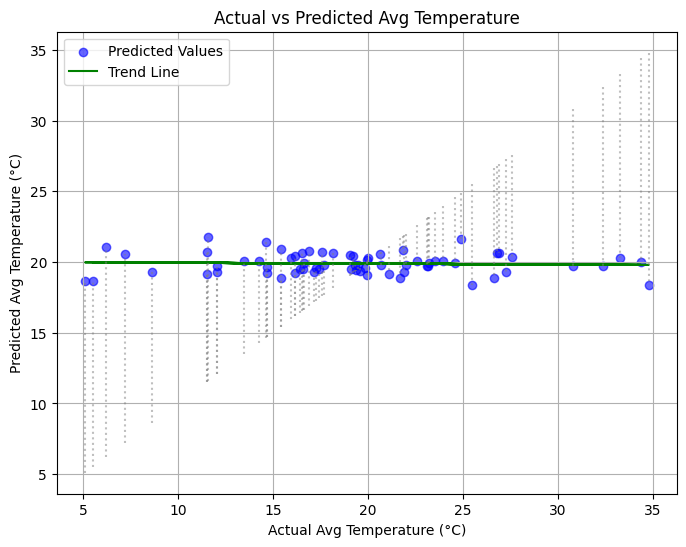

In [129]:

# Compute trend line
reg = LinearRegression().fit(Y_test, Y_pred)
Y_trend = reg.predict(Y_test)

# Plotting Actual vs Predicted with a trend line
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(Y_test, Y_pred, label='Predicted Values', color='blue', alpha=0.6)

# Trend line
plt.plot(Y_test, Y_trend, color='green', linestyle='-', label='Trend Line')

# Connecting actual and predicted values
for actual, predicted in zip(Y_test, Y_pred):
    plt.plot([actual, actual], [actual, predicted], color='gray', linestyle='dotted', alpha=0.5)

# Labels and title
plt.xlabel('Actual Avg Temperature (°C)')
plt.ylabel('Predicted Avg Temperature (°C)')
plt.title('Actual vs Predicted Avg Temperature')

# Grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()
